<a href="https://colab.research.google.com/github/Sindhura942/DeepLearning/blob/main/California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California Housing dataset with feature names
california_data = fetch_california_housing(as_frame=True)

# Convert to a pandas DataFrame
california_df = california_data.frame

# Display the first 5 rows
print(california_df.head())


   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0250 - val_loss: 0.4017
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3684 - val_loss: 0.3873
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3262 - val_loss: 0.3726
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3284 - val_loss: 0.3541
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3073 - val_loss: 0.3263
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2780 - val_loss: 0.3361
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2950 - val_loss: 0.3267
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3015 - val_loss: 0.3097
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2810 - val_loss: 0.2997
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2787 - val_loss: 0.4094
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2822 - val_loss: 0.2929
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

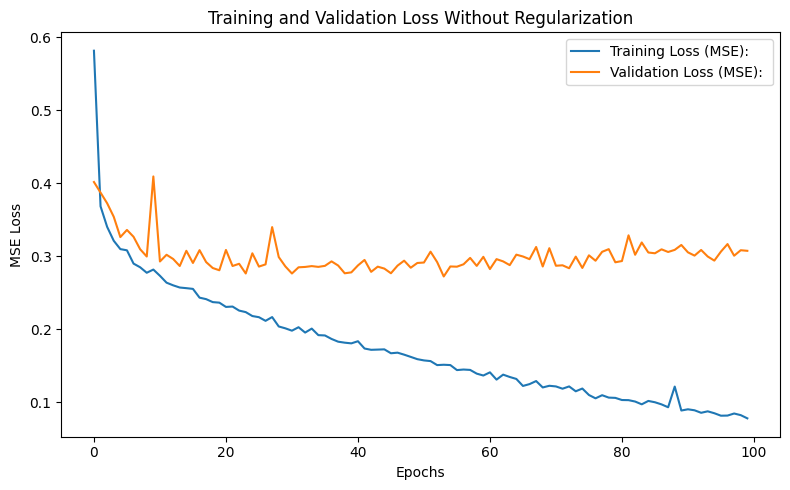

In [9]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Load and Split the Data
data = fetch_california_housing()
X,Y = data.data , data.target

X_train,X_test ,Y_train ,Y_test = train_test_split(
    X,Y, test_size =0.2 , random_state= 42
)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building a Deep Neural Network without Regularization
model = tf.keras.Sequential([
      layers.Dense(128 , activation = 'relu' , input_shape = (X_train.shape[1],)),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(1),
 ])

#Compiling the Model
model.compile(optimizer = 'adam' , loss = 'mse')

#Train the Model
history =  model.fit(
    X_train ,
    Y_train ,
    epochs = 100 ,
    batch_size = 32 ,
    validation_split = 0.2 ,
    verbose = 1
)


#Evaluation on the Test Data
test_mse = model.evaluate(X_test , Y_test ,verbose = 0)
print(f"Test MSE: {test_mse: .4f}")

#Ploting the Training and Valiadation Loss

plt.figure(figsize = (8,5))
plt.plot(history.history['loss'] , label = 'Training Loss (MSE): ')
plt.plot(history.history['val_loss'], label = 'Validation Loss (MSE): ')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Without Regularization')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.5535 - val_loss: 0.4416
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3903 - val_loss: 0.4738
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5349 - val_loss: 0.4161
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3574 - val_loss: 0.4148
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3361 - val_loss: 0.3476
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3163 - val_loss: 0.3665
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3100 - val_loss: 0.3488
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3100 - val_loss: 0.3219
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3027 - val_loss: 0.3261
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2799 - val_loss: 0.3133
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2839 - val_loss: 0.3457
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

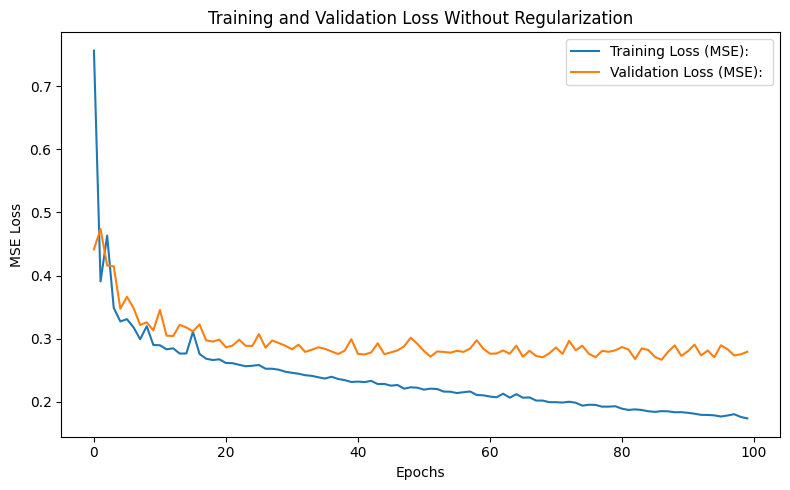

In [10]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Load and Split the Data
data = fetch_california_housing()
X,Y = data.data , data.target

X_train,X_test ,Y_train ,Y_test = train_test_split(
    X,Y, test_size =0.2 , random_state= 42
)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building a Deep Neural Network without Regularization
model = tf.keras.Sequential([
      layers.Dense(128 , activation = 'relu' , input_shape = (X_train.shape[1],)),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(1),
 ])

#Compiling the Model
model.compile(optimizer = 'adam' , loss = 'mse')

#Train the Model
history =  model.fit(
    X_train ,
    Y_train ,
    epochs = 100 ,
    batch_size = 32 ,
    validation_split = 0.2 ,
    verbose = 1
)


#Evaluation on the Test Data
test_mse = model.evaluate(X_test , Y_test ,verbose = 0)
print(f"Test MSE: {test_mse: .4f} ")


#Ploting the Training and Valiadation Loss

plt.figure(figsize = (8,5))
plt.plot(history.history['loss'] , label = 'Training Loss (MSE): ')
plt.plot(history.history['val_loss'], label = 'Validation Loss (MSE): ')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Without Regularization')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3089 - mae: 0.7915 - val_loss: 0.4232 - val_mae: 0.4624
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3880 - mae: 0.4448 - val_loss: 0.3804 - val_mae: 0.4372
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3604 - mae: 0.4245 - val_loss: 0.3800 - val_mae: 0.4357
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3394 - mae: 0.4112 - val_loss: 0.3484 - val_mae: 0.4104
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3142 - mae: 0.3939 - val_loss: 0.3476 - val_mae: 0.4111
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3041 - mae: 0.3856 - val_loss: 0.3338 - val_mae: 0.4142
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3038 - mae: 0.3857 - val_loss: 0.3315 - val_mae: 0.4002
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2993 - mae: 0.3822 - val_loss: 0.3234 - val_mae: 0.4049
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

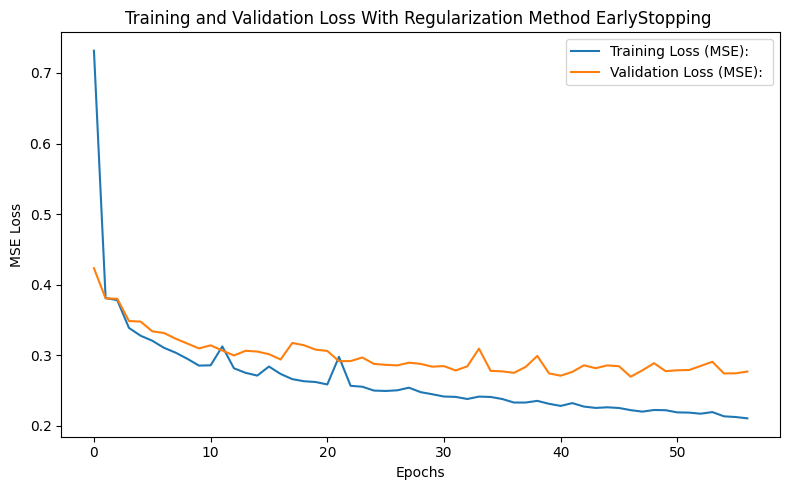

In [14]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Load and Split the Data
data = fetch_california_housing()
X,Y = data.data , data.target

X_train,X_test ,Y_train ,Y_test = train_test_split(
    X,Y, test_size =0.2 , random_state= 42
)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building a Deep Neural Network with Regularization
model = tf.keras.Sequential([
      layers.Dense(128 , activation = 'relu' , input_shape = (X_train.shape[1],)),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(1),
 ])

#Compiling the Model
model.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['mae'])


#Using Regularization For solving Overfitting
early_stop =  EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1,
    )

#Train the Model
history =  model.fit(
    X_train ,
    Y_train ,
    epochs = 100 ,
    batch_size = 32 ,
    validation_split = 0.2 ,
    callbacks = [early_stop],
    verbose = 1
)




#Evaluation on the Test Data
test_mse,test_mae = model.evaluate(X_test , Y_test ,verbose = 0)
print(f"\n Test MSE: {test_mse: .4f}")
print(f"Test MAE:  {test_mae: .4f}")

#Ploting the Training and Valiadation Loss

plt.figure(figsize = (8,5))
plt.plot(history.history['loss'] , label = 'Training Loss (MSE): ')
plt.plot(history.history['val_loss'], label = 'Validation Loss (MSE): ')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss With Regularization Method EarlyStopping ')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0409 - mae: 0.6788 - val_loss: 0.4012 - val_mae: 0.4576
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3583 - mae: 0.4290 - val_loss: 0.3764 - val_mae: 0.4277
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3978 - mae: 0.4261 - val_loss: 0.3694 - val_mae: 0.4392
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3369 - mae: 0.4079 - val_loss: 0.3356 - val_mae: 0.3993
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3122 - mae: 0.3845 - val_loss: 0.3390 - val_mae: 0.4104
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3058 - mae: 0.3846 - val_loss: 0.3421 - val_mae: 0.3933
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2913 - mae: 0.3745 - val_loss: 0.3533 - val_mae: 0.4056
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3214 - mae: 0.3816 - val_loss: 0.3266 - val_mae: 0.3887
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss:

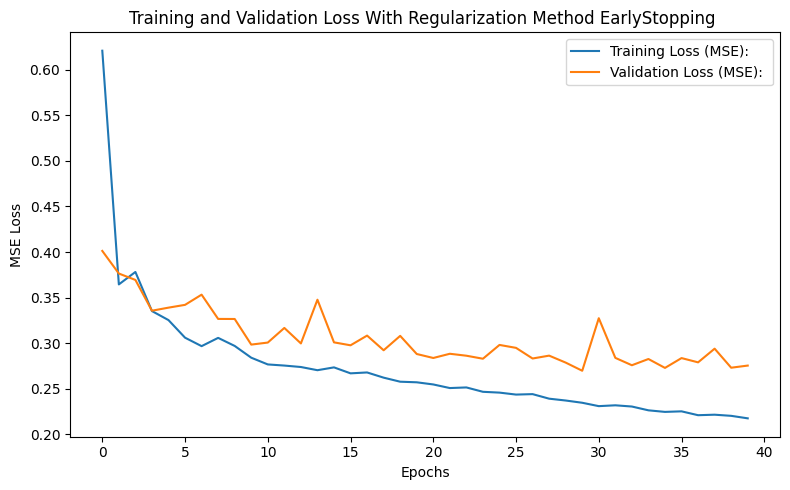

In [28]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Load and Split the Data
data = fetch_california_housing()
X,Y = data.data , data.target

X_train,X_test ,Y_train ,Y_test = train_test_split(
    X,Y, test_size =0.2 , random_state= 42
)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building a Deep Neural Network with Regularization
model = tf.keras.Sequential([
      layers.Dense(256 , activation = 'relu' , input_shape = (X_train.shape[1],)),
      layers.Dense(256, activation = 'relu'),


      layers.Dense(1),
 ])

#Compiling the Model
model.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['mae'])


#Using Regularization For solving Overfitting
early_stop =  EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1,
    )

#Train the Model
history =  model.fit(
    X_train ,
    Y_train ,
    epochs = 100 ,
    batch_size = 32 ,
    validation_split = 0.2 ,
    callbacks = [early_stop],
    verbose = 1
)




#Evaluation on the Test Data
test_mse,test_mae = model.evaluate(X_test , Y_test ,verbose = 0)
print(f"\n Test MSE: {test_mse: .4f}")
print(f"Test MAE:  {test_mae: .4f}")

#Ploting the Training and Valiadation Loss

plt.figure(figsize = (8,5))
plt.plot(history.history['loss'] , label = 'Training Loss (MSE): ')
plt.plot(history.history['val_loss'], label = 'Validation Loss (MSE): ')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss With Regularization Method EarlyStopping ')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9571 - mae: 0.6790 - val_loss: 0.4120 - val_mae: 0.4617
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3782 - mae: 0.4381 - val_loss: 0.3693 - val_mae: 0.4371
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3993 - mae: 0.4303 - val_loss: 0.4580 - val_mae: 0.4384
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3841 - mae: 0.4151 - val_loss: 0.3704 - val_mae: 0.4460
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3193 - mae: 0.3942 - val_loss: 0.3504 - val_mae: 0.4186
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3211 - mae: 0.3871 - val_loss: 0.4030 - val_mae: 0.4146
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3243 - mae: 0.3870 - val_loss: 0.3117 - val_mae: 0.3807
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2960 - mae: 0.3743 - val_loss: 0.3213 - val_mae: 0.3873
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

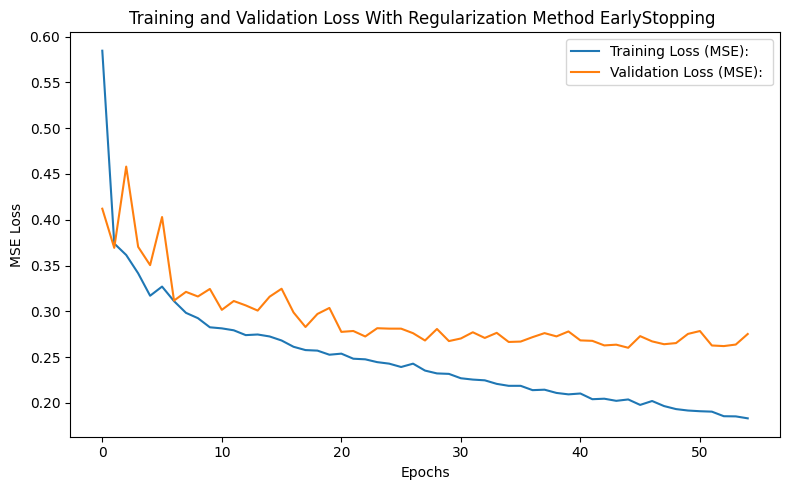

In [30]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Load and Split the Data
data = fetch_california_housing()
X,Y = data.data , data.target

X_train,X_test ,Y_train ,Y_test = train_test_split(
    X,Y, test_size =0.2 , random_state= 42
)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building a Deep Neural Network with Regularization
model = tf.keras.Sequential([
      layers.Dense(270 , activation = 'relu' , input_shape = (X_train.shape[1],)),
      layers.Dense(270, activation = 'relu'),


      layers.Dense(1),
 ])

#Compiling the Model
model.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['mae'])


#Using Regularization For solving Overfitting
early_stop =  EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights = True,
    verbose = 1,
    )

#Train the Model
history =  model.fit(
    X_train ,
    Y_train ,
    epochs = 100 ,
    batch_size = 32 ,
    validation_split = 0.2 ,
    callbacks = [early_stop],
    verbose = 1
)




#Evaluation on the Test Data
test_mse,test_mae = model.evaluate(X_test , Y_test ,verbose = 0)
print(f"\n Test MSE: {test_mse: .4f}")
print(f"Test MAE:  {test_mae: .4f}")

#Ploting the Training and Valiadation Loss

plt.figure(figsize = (8,5))
plt.plot(history.history['loss'] , label = 'Training Loss (MSE): ')
plt.plot(history.history['val_loss'], label = 'Validation Loss (MSE): ')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss With Regularization Method EarlyStopping ')
plt.legend()
plt.tight_layout()
plt.show()